In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd

In [64]:
# Import CSV Files
nondurable = pd.read_csv('Resources/nondurable_no_commas.csv')
durable = pd.read_csv('Resources/Durable-no-commas.csv')
necessities = pd.read_csv('Resources/necessityitems_consumption_15_20.csv')
df = pd.read_csv('Resources/grocery_consumption_19_20.csv')
fb_df = pd.read_csv('Resources/food_bev_data.csv')

# Remove white space from the left of the category names
nondurable['Consumption Category '] = nondurable['Consumption Category '].str.lstrip()
durable['Category'] = durable['Category'].str.lstrip()
fb_df['Consumption Category '] = fb_df['Consumption Category '].str.lstrip()

In [29]:
# Separate non-durable goods into years, and verify the data is in number form
nond_data19 = nondurable.loc[:, ['Consumption Category ', '2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06', '2019M07', '2019M08', '2019M09']]
nond_data20 = nondurable.loc[:, ['Consumption Category ', '2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06', '2020M07', '2020M08', '2020M09']]

# Separate durable goods into years, and verify the data is in number form
dur_data19 = durable.loc[:, ['Category', '2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06', '2019M07', '2019M08', '2019M09']]
dur_data20 = durable.loc[:, ['Category', '2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06', '2020M07', '2020M08', '2020M09']]

# Separate necessities data into years
necessities19 = necessities.loc[:, ['Consumption Category ', '2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06', '2019M07', '2019M08', '2019M09']]
necessities20 = necessities.loc[:, ['Consumption Category ', '2020M01', '2020M02', '2020M03', '2020M04',
       '2020M05', '2020M06', '2020M07', '2020M08', '2020M09']]


In [30]:
# Set the index of each table to the Consumption Category
dur_data19 = dur_data19.set_index('Category')
dur_data20 = dur_data20.set_index('Category')

nond_data19 = nond_data19.set_index('Consumption Category ')
nond_data20 = nond_data20.set_index('Consumption Category ')

graph_necessities19 = necessities19.set_index('Consumption Category ')
graph_necessities20 = necessities20.set_index('Consumption Category ')

In [31]:
# Set up data for Panic Buy Graphs
graph19_df = graph_necessities19[['2019M01', '2019M02', '2019M03', '2019M04',
        '2019M05', '2019M06', '2019M07', '2019M08', '2019M09']]
months = graph19_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]

graph20_df = graph_necessities20[['2020M01', '2020M02', '2020M03', '2020M04',
       '2020M05', '2020M06', '2020M07', '2020M08', '2020M09']]
months = graph20_df.keys()
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]

In [5]:
# Create x values for graphs
x_values = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']

# What items spiked during the initial period of fear and panic?

Our hypothesis was that specific items would become household necessities when the pandemic was new and fear and uncertainty were at their highest.

We noticed spikes in the following items during the initial panic for the pandemic:
* Household Cleaning Supplies
* Household Paper Products
* Food and Groceries
* Beverages, especially alcohol

In [38]:
# Month Over Month Comparison 

mom_data = necessities.loc[:, ['Consumption Category ', 
        '2019M01', '2019M02', '2019M03', '2019M04','2019M05', '2019M06', '2019M07', '2019M08', '2019M09',
        '2020M01', '2020M02', '2020M03', '2020M04','2020M05', '2020M06', '2020M07', '2020M08', '2020M09']]
mom_data = mom_data.set_index('Consumption Category ')

mom19 = mom_data.loc[['Gasoline and other motor fuel','Prescription drugs',
                      'Nonprescription drugs','Other medical products','Household cleaning products',
                    'Household paper products'],['2019M01', '2019M02', '2019M03', '2019M04','2019M05',
                    '2019M06', '2019M07', '2019M08', '2019M09']]

mom19

mom20 = mom_data.loc[['Gasoline and other motor fuel','Prescription drugs',
                      'Nonprescription drugs','Other medical products','Household cleaning products',
                    'Household paper products'],['2020M01', '2020M02', '2020M03', '2020M04','2020M05',
                    '2020M06', '2020M07', '2020M08', '2020M09']]

mom20

,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
Consumption Category,,,,,,,,,
Gasoline and other motor fuel,414196,412515,348239,258098,312138,352503,363811,369140,374007
Prescription drugs,397892,404197,429613,392311,396323,404648,408873,412429,417457
Nonprescription drugs,78626,79126,85388,76229,79927,82875,85731,84330,84740
Other medical products,6612,6614,6215,5233,5800,6284,6791,6945,7151
Household cleaning products,39791,40017,46227,40557,42437,42594,41637,41494,41810
Household paper products,38042,37937,44706,37601,39052,39452,37998,37965,39656


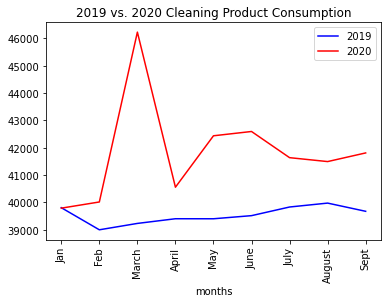

In [39]:
# Panic Spending for Cleaning Products

# 2019 vs. 2020 Cleaning Product Consumption
cleaningproduct19 = plt.plot(months, graph19_df.loc['Household cleaning products',['2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06',
       '2019M07', '2019M08', '2019M09']], color="blue", label="2019")

cleaningproduct20 = plt.plot(months, graph20_df.loc['Household cleaning products',['2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06',
       '2020M07', '2020M08', '2020M09']], color="red", label="2020")

plt.legend([2019, 2020], loc="best")
plt.title("2019 vs. 2020 Cleaning Product Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.savefig('Images/cleaningproducts19vs20.png')
plt.show()

In [40]:
# CLEANING PRODUCTS MONTH OVER MONTH

mom19_cleaning = mom19.loc[['Household cleaning products'],['2019M01', '2019M02', '2019M03', '2019M04','2019M05',
                    '2019M06', '2019M07', '2019M08', '2019M09']]
mom19_cleaning


mom20_cleaning = mom20.loc[['Household cleaning products'],['2020M01', '2020M02', '2020M03', '2020M04','2020M05',
                    '2020M06', '2020M07', '2020M08', '2020M09']]
mom20_cleaning


cleaning19_df = pd.DataFrame({
    'January': mom19_cleaning['2019M01'],
    'February': mom19_cleaning['2019M02'],
    'March': mom19_cleaning['2019M03'],
    'April': mom19_cleaning['2019M04'],
    'May': mom19_cleaning['2019M05'],
    'June': mom19_cleaning['2019M06'],
    'July': mom19_cleaning['2019M07'],
    'August': mom19_cleaning['2019M08'],
    'September': mom19_cleaning['2019M09']
    
})

cleaning19_df = cleaning19_df.rename(index={'Household cleaning products':'2019 Household Cleaning Products'})

cleaning20_df = pd.DataFrame({
    'January': mom20_cleaning['2020M01'],
    'February': mom20_cleaning['2020M02'],
    'March': mom20_cleaning['2020M03'],
    'April': mom20_cleaning['2020M04'],
    'May': mom20_cleaning['2020M05'],
    'June': mom20_cleaning['2020M06'],
    'July': mom20_cleaning['2020M07'],
    'August': mom20_cleaning['2020M08'],
    'September': mom20_cleaning['2020M09']
    
})
cleaning20_df = cleaning20_df.rename(index={'Household cleaning products':'2020 Household Cleaning Products'})

cleaning19_df
cleaning20_df

cleaning_df = pd.DataFrame({
    'January': mom20_cleaning['2020M01'],
    'February': mom20_cleaning['2020M02'],
    'March': mom20_cleaning['2020M03'],
    'April': mom20_cleaning['2020M04'],
    'May': mom20_cleaning['2020M05'],
    'June': mom20_cleaning['2020M06'],
    'July': mom20_cleaning['2020M07'],
    'August': mom20_cleaning['2020M08'],
    'September': mom20_cleaning['2020M09']
})

cleaning_df = cleaning19_df.merge(cleaning20_df, on=('Consumption Category ','January','February','March','April','May','June','July',
                    'August','September'), how='outer')

cleaning_df = cleaning_df.transpose()
cleaning_df['Percent Change'] = ""

cleaning_df.apply(lambda row: (row.iloc[1]-row.iloc[0])/row.iloc[0]*100, axis=1)

January      -0.042705
February      2.607692
March        17.826829
April         2.926099
May           7.699921
June          7.786522
July          4.528908
August        3.797278
September     5.378566
dtype: float64

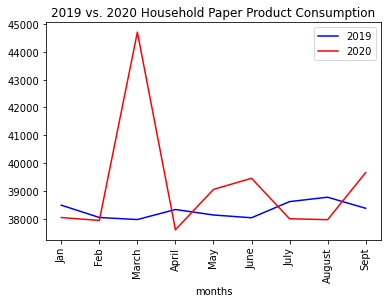

In [41]:
# Panic Spending for Paper Products

# 2019 vs. 2020 Household Paper Product Consumption
presceiptiondrugs19 = plt.plot(months, graph19_df.loc['Household paper products',['2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06',
       '2019M07', '2019M08', '2019M09']], color="blue", label="2019")

prescriptiondrugs20 = plt.plot(months, graph20_df.loc['Household paper products',['2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06',
       '2020M07', '2020M08', '2020M09']], color="red", label="2020")

plt.legend([2019, 2020], loc="best")
plt.title("2019 vs. 2020 Household Paper Product Consumption")
plt.xlabel("months")
plt.xticks(rotation="vertical")
plt.savefig('Images/paperproducts19vs20.png')
plt.show()

In [43]:
# HOUSEHOLD PAPER PRODUCTS MONTH OVER MONTH

mom19_paper = mom19.loc[['Household paper products'],['2019M01', '2019M02', '2019M03', '2019M04','2019M05',
                    '2019M06', '2019M07', '2019M08', '2019M09']]
mom19_paper


mom20_paper = mom20.loc[['Household paper products'],['2020M01', '2020M02', '2020M03', '2020M04','2020M05',
                    '2020M06', '2020M07', '2020M08', '2020M09']]
mom20_paper


paper19_df = pd.DataFrame({
    'January': mom19_paper['2019M01'],
    'February': mom19_paper['2019M02'],
    'March': mom19_paper['2019M03'],
    'April': mom19_paper['2019M04'],
    'May': mom19_paper['2019M05'],
    'June': mom19_paper['2019M06'],
    'July': mom19_paper['2019M07'],
    'August': mom19_paper['2019M08'],
    'September': mom19_paper['2019M09']
    
})

paper19_df = paper19_df.rename(index={'Household paper products':'2019 Household paper products'})

paper20_df = pd.DataFrame({
    'January': mom20_paper['2020M01'],
    'February': mom20_paper['2020M02'],
    'March': mom20_paper['2020M03'],
    'April': mom20_paper['2020M04'],
    'May': mom20_paper['2020M05'],
    'June': mom20_paper['2020M06'],
    'July': mom20_paper['2020M07'],
    'August': mom20_paper['2020M08'],
    'September': mom20_paper['2020M09']
    
})
paper20_df = paper20_df.rename(index={'Household paper products':'2020 Household paper products'})

paper19_df
paper20_df

paper_df = pd.DataFrame({
    'January': mom20_paper['2020M01'],
    'February': mom20_paper['2020M02'],
    'March': mom20_paper['2020M03'],
    'April': mom20_paper['2020M04'],
    'May': mom20_paper['2020M05'],
    'June': mom20_paper['2020M06'],
    'July': mom20_paper['2020M07'],
    'August': mom20_paper['2020M08'],
    'September': mom20_paper['2020M09']
})

paper_df = paper19_df.merge(paper20_df, on=('Consumption Category ','January','February','March','April','May','June','July',
                    'August','September'), how='outer')

paper_df = paper_df.transpose()

paper_df['Percent Change'] = ""

paper_df.apply(lambda row: (row.iloc[1]-row.iloc[0])/row.iloc[0]*100, axis=1)

January      -1.153666
February     -0.278632
March        17.743422
April        -1.901905
May           2.409986
June          3.730970
July         -1.595276
August       -2.081399
September     3.340804
dtype: float64

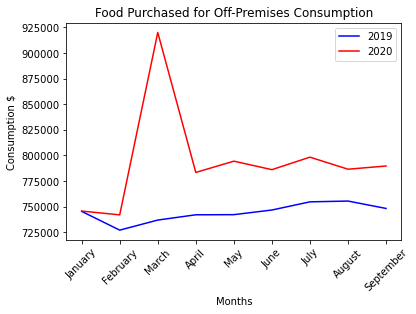

In [45]:
# Panic Spending for Groceries

plt.plot(x_values, nond_data19.loc['Food purchased for off-premises consumption',:], color='blue')
plt.plot(x_values, nond_data20.loc['Food purchased for off-premises consumption',:], color='red')

plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.title('Food Purchased for Off-Premises Consumption')
plt.xticks(rotation=45)
plt.legend(['2019','2020'], loc='best')

In [47]:
mom19_food = nond_data19.loc[['Food and beverages purchased for off-premises consumption'],['2019M01', '2019M02', '2019M03', '2019M04','2019M05',
                    '2019M06', '2019M07', '2019M08', '2019M09']]
mom19_food


mom20_food = nond_data20.loc[['Food and beverages purchased for off-premises consumption'],['2020M01', '2020M02', '2020M03', '2020M04','2020M05',
                    '2020M06', '2020M07', '2020M08', '2020M09']]
mom20_food


food19_df = pd.DataFrame({
    'January': mom19_food['2019M01'],
    'February': mom19_food['2019M02'],
    'March': mom19_food['2019M03'],
    'April': mom19_food['2019M04'],
    'May': mom19_food['2019M05'],
    'June': mom19_food['2019M06'],
    'July': mom19_food['2019M07'],
    'August': mom19_food['2019M08'],
    'September': mom19_food['2019M09']
    
})

food19_df = food19_df.rename(index={'Household paper products':'2019 Household paper products'})

food20_df = pd.DataFrame({
    'January': mom20_food['2020M01'],
    'February':mom20_food['2020M02'],
    'March': mom20_food['2020M03'],
    'April': mom20_food['2020M04'],
    'May': mom20_food['2020M05'],
    'June': mom20_food['2020M06'],
    'July': mom20_food['2020M07'],
    'August': mom20_food['2020M08'],
    'September': mom20_food['2020M09']
    
})
food20_df = food20_df.rename(index={'Household paper products':'2020 Household paper products'})

food_df = pd.DataFrame({
    'January': mom20_food['2020M01'],
    'February':mom20_food['2020M02'],
    'March': mom20_food['2020M03'],
    'April': mom20_food['2020M04'],
    'May': mom20_food['2020M05'],
    'June': mom20_food['2020M06'],
    'July': mom20_food['2020M07'],
    'August': mom20_food['2020M08'],
    'September': mom20_food['2020M09']
})

food_df = food19_df.merge(food20_df, on=('Consumption Category ','January','February','March','April','May','June','July',
                    'August','September'), how='outer')

food_df = food_df.transpose()

food_df['Percent Change'] = ""

food_df.apply(lambda row: (row.iloc[1]-row.iloc[0])/row.iloc[0]*100, axis=1)

January       0.508682
February      2.421532
March        23.757810
April         5.150909
May           7.472037
June          6.072626
July          6.507793
August        5.134149
September     6.405669
dtype: float64

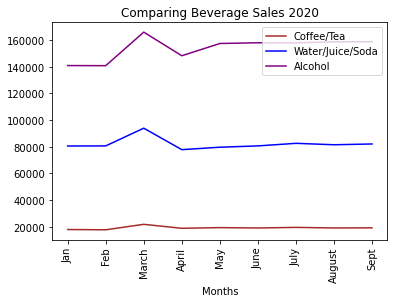

In [50]:
# Panic Spending for Beverages

# Create beverage data frame
bev_df = df.loc[[df.index[9],df.index[10],df.index[11]]]
bev_df = bev_df.set_index(['Grocery Consumption Category '])

months = ["Jan","Feb","March","April","May","June","July","August","Sept"]

#graphing coffee vs mineral waters vs alcoholic bevs 2020
coffee, = plt.plot(months, bev_df.loc['          Coffee tea and other beverage materials',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="brown", label="Coffee/Tea")
water, = plt.plot(months, bev_df.loc['          Mineral waters soft drinks and vegetable juices',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="blue", label="Water/Juice/Soda")
alcohol, = plt.plot(months, bev_df.loc['          Alcoholic beverages purchased for off-premises consumption',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="purple", label="Alcohol")

# Create a legend for our chart
plt.legend(handles=[coffee,water,alcohol], loc="best")
plt.title("Comparing Beverage Sales 2020")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()

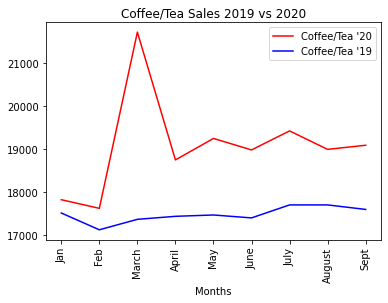

In [52]:
#comparing coffee 2020 to 2019

coffee20, = plt.plot(months, bev_df.loc['          Coffee tea and other beverage materials',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Coffee/Tea '20")

coffee19, = plt.plot(months, bev_df.loc['          Coffee tea and other beverage materials',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="blue", label="Coffee/Tea '19")
# Create a legend for our chart
plt.legend(handles=[coffee20,coffee19], loc="best")
plt.title("Coffee/Tea Sales 2019 vs 2020")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()

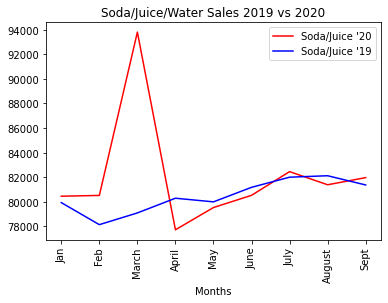

In [53]:
#comparing soda/mineralwater/juice 2020 to 2019

soda20, = plt.plot(months, bev_df.loc['          Mineral waters soft drinks and vegetable juices',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Soda/Juice '20")

soda19, = plt.plot(months, bev_df.loc['          Mineral waters soft drinks and vegetable juices',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="blue", label="Soda/Juice '19")
# Create a legend for our chart
plt.legend(handles=[soda20,soda19], loc="best")
plt.title("Soda/Juice/Water Sales 2019 vs 2020")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()

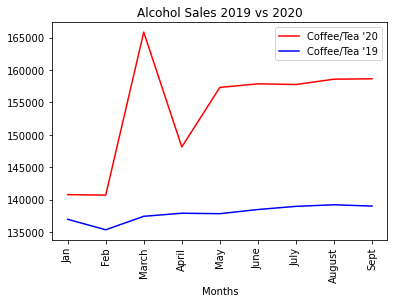

In [54]:
#comparing alcohol 2020 to 2019

alcohol20, = plt.plot(months, bev_df.loc['          Alcoholic beverages purchased for off-premises consumption',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Coffee/Tea '20")

alcohol19, = plt.plot(months, bev_df.loc['          Alcoholic beverages purchased for off-premises consumption',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="blue", label="Coffee/Tea '19")
# Create a legend for our chart
plt.legend(handles=[alcohol20,alcohol19], loc="best")
plt.title("Alcohol Sales 2019 vs 2020")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.show()

# What trends appeared as people started adjusting to the new normal?

We theorized that as people became used to the "new normal," buying trends would change and different items would see a spike in purchasing habits. We noticed a spike in three specific categories of goods:
* Goods for Productivity at Home
* Goods for Comfort and Safety at Home
* Goods for Entertainment at Home

## Productivity Purchasing Spikes

2019 Personal Computers and Tablets: y = 3180.93x + 54614.76
2020 Personal Computers and Tablets: y = 14576.67x + 56340.56


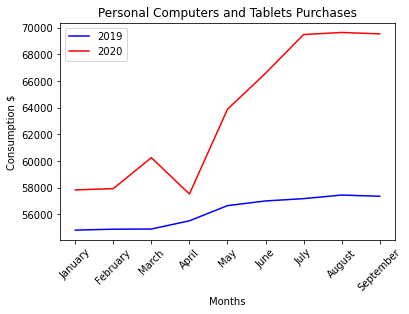

In [22]:
# Personal Computers and Tablets

# Plot 2019 vs. 2020
plt.plot(x_values, dur_data19.loc['Personal computers/tablets and peripheral equipment',:], color='blue')
plt.plot(x_values, dur_data20.loc['Personal computers/tablets and peripheral equipment',:], color='red')

plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.title('Personal Computers and Tablets Purchases')
plt.xticks(rotation=45)
plt.legend(['2019','2020'], loc='best')

# 2019 Linear Regression
x_reg_values = np.linspace(0,1,len(dur_data19.loc['Personal computers/tablets and peripheral equipment',:]))
y_values = dur_data19.loc['Personal computers/tablets and peripheral equipment',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2019 Personal Computers and Tablets: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# 2020 Linear Regression
x_reg_values = np.linspace(0,1,len(dur_data20.loc['Personal computers/tablets and peripheral equipment',:]))
y_values = dur_data20.loc['Personal computers/tablets and peripheral equipment',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2020 Personal Computers and Tablets: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

2019 Tools & Equipment for House & Garden: y = 132.53x + 32081.73
2020 Tools & Equipment for House & Garden: y = 5684.67x + 33000.78


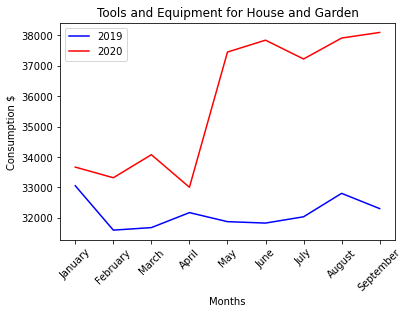

In [23]:
# Tools and Equipment for House and Garden

# Plot 2019 vs. 2020
plt.plot(x_values, dur_data19.loc['Tools and equipment for house and garden (35)',:], color='blue', label='Tools and Equipment for House and Garden - 2019')
plt.plot(x_values, dur_data20.loc['Tools and equipment for house and garden (35)',:], color='red', label='Tools and Equipment for House and Garden - 2020')

plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.title('Tools and Equipment for House and Garden')
plt.xticks(rotation=45)
plt.legend(['2019','2020'], loc='best')

# 2019 Linear Regression
x_reg_values = np.linspace(0,1,len(dur_data19.loc['Tools and equipment for house and garden (35)',:]))
y_values = dur_data19.loc['Tools and equipment for house and garden (35)',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2019 Tools & Equipment for House & Garden: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# 2020 Linear Regression
x_reg_values = np.linspace(0,1,len(dur_data20.loc['Tools and equipment for house and garden (35)',:]))
y_values = dur_data20.loc['Tools and equipment for house and garden (35)',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2020 Tools & Equipment for House & Garden: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

## Comfort Purchasing Spikes

2019 Sporting Equipment, Guns, Ammunition: y = 6199.07x + 76163.02
2020 Sporting Equipment, Guns, Ammunition: y = 24271.73x + 79902.69


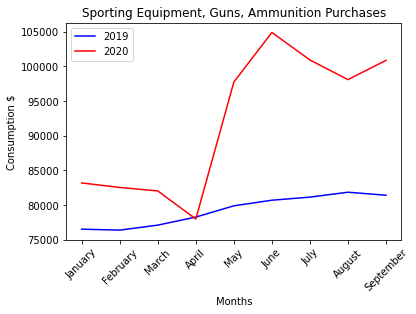

In [18]:
# Sporting Equipment, Guns, Ammunition

# Plot 2019 vs. 2020
plt.plot(x_values, dur_data19.loc['Sporting equipment, supplies, guns, and ammunition (part of 80)',:], color='blue', label='Sporting Equipment, Guns, Ammunition - 2019')
plt.plot(x_values, dur_data20.loc['Sporting equipment, supplies, guns, and ammunition (part of 80)',:], color='red', label='Sporting Equipment, Guns, Ammunition - 2020')

plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.title('Sporting Equipment, Guns, Ammunition Purchases')
plt.xticks(rotation=45)
plt.legend(['2019','2020'], loc='best')

# 2019 Linear Regression
x_reg_values = np.linspace(0,1,len(dur_data19.loc['Sporting equipment, supplies, guns, and ammunition (part of 80)',:]))
y_values = dur_data19.loc['Sporting equipment, supplies, guns, and ammunition (part of 80)',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2019 Sporting Equipment, Guns, Ammunition: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# 2020 Linear Regression
x_reg_values = np.linspace(0,1,len(dur_data20.loc['Sporting equipment, supplies, guns, and ammunition (part of 80)',:]))
y_values = dur_data20.loc['Sporting equipment, supplies, guns, and ammunition (part of 80)',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2020 Sporting Equipment, Guns, Ammunition: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

2019 Small Electric Appliances: y = 382.67x + 9288.44
2020 Small Electric Appliances: y = 1598.67x + 9498.0


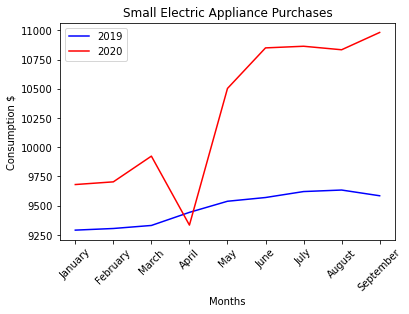

In [19]:
# Small Electric Appliances Purchases

plt.plot(x_values, dur_data19.loc['Small electric household appliances',:], color='blue', label='Small Appliances - 2019')
plt.plot(x_values, dur_data20.loc['Small electric household appliances',:], color='red', label='Small Appliances - 2020')

plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.title('Small Electric Appliance Purchases')
plt.xticks(rotation=45)
plt.legend(['2019','2020'], loc='best')

# 2019 Linear Regression
x_reg_values = np.linspace(0,1,len(dur_data19.loc['Small electric household appliances',:]))
y_values = dur_data19.loc['Small electric household appliances',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2019 Small Electric Appliances: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# 2020 Linear Regression
x_reg_values = np.linspace(0,1,len(dur_data20.loc['Small electric household appliances',:]))
y_values = dur_data20.loc['Small electric household appliances',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2020 Small Electric Appliances: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

## Entertainment Purchasing Spikes

2019 Games, Toys, & Hobbies: y = 12150.4x + 120474.24
2020 Games, Toys, & Hobbies: y = 52122.67x + 133118.44


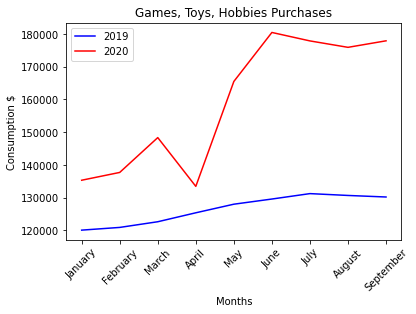

In [20]:
# Games, Toys, Hobbies

# Plot 2019 vs. 2020
plt.plot(x_values, nond_data19.loc['Games toys and hobbies',:], color='blue', label='Games, Toys, Hobbies - 2019')
plt.plot(x_values, nond_data20.loc['Games toys and hobbies',:], color='red', label='Games, Toys, Hobbies - 2020')

plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.title('Games, Toys, Hobbies Purchases')
plt.xticks(rotation=45)
plt.legend(['2019','2020'], loc='best')

#2019 Linear Regression
x_reg_values = np.linspace(0,1,len(nond_data19.loc['Games toys and hobbies',:]))
y_values = nond_data19.loc['Games toys and hobbies',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2019 Games, Toys, & Hobbies: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# 2020 Linear Regression
x_reg_values = np.linspace(0,1,len(nond_data20.loc['Games toys and hobbies',:]))
y_values = nond_data20.loc['Games toys and hobbies',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2020 Games, Toys, & Hobbies: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

2019 Recreational Vehicles: y = 1775.2x + 47844.96
2020 Recreational Vehicles: y = 26494.27x + 43969.09


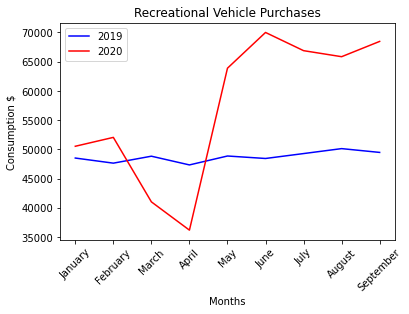

In [21]:
# Recreational Vehicles

# Plot 2019 vs. 2020
plt.plot(x_values, dur_data19.loc['Pleasure boats, aircraft, and other recreational vehicles',:], color='blue', label='Recreational Vehicles - 2019')
plt.plot(x_values, dur_data20.loc['Pleasure boats, aircraft, and other recreational vehicles',:], color='red', label='Recreational Vehicles - 2020')

plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.title('Recreational Vehicle Purchases')
plt.xticks(rotation=45)
plt.legend(['2019','2020'], loc='best')

# 2019 Linear Regression
x_reg_values = np.linspace(0,1,len(dur_data19.loc['Pleasure boats, aircraft, and other recreational vehicles',:]))
y_values = dur_data19.loc['Pleasure boats, aircraft, and other recreational vehicles',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2019 Recreational Vehicles: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# 2020 Linear Regression
x_reg_values = np.linspace(0,1,len(dur_data20.loc['Pleasure boats, aircraft, and other recreational vehicles',:]))
y_values = dur_data20.loc['Pleasure boats, aircraft, and other recreational vehicles',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2020 Recreational Vehicles: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Unexpected Trends

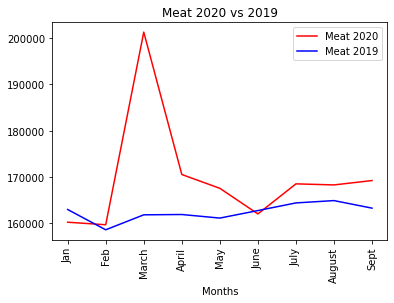

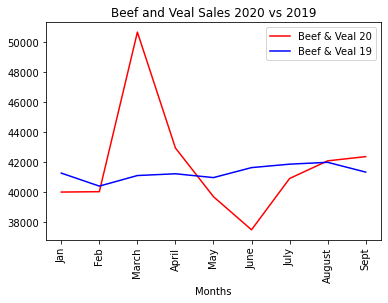

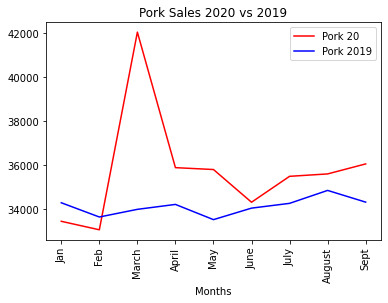

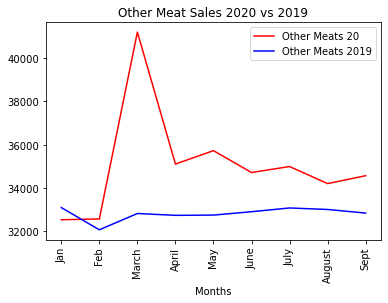

In [68]:
# Meat Trends

meat_df = fb_df.loc[[fb_df.index[7],fb_df.index[8],fb_df.index[9], fb_df.index[10], fb_df.index[11],fb_df.index[12]]]
meat_df = meat_df.set_index('Consumption Category ')

# Plotting Meat Trends
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]
meats20, = plt.plot(months, meat_df.loc['Meats and poultry',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Meat 2020")

meats19, = plt.plot(months, meat_df.loc['Meats and poultry',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="blue", label="Meat 2019")


# Create a legend for our chart
plt.legend(handles=[meats20,meats19], loc="best")
plt.title("Meat 2020 vs 2019")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.savefig('Images/Meat20vs19.png')
plt.show()

# Plot beef and veal
months = ["Jan","Feb","March","April","May","June","July","August","Sept"]
beefveal20, = plt.plot(months, meat_df.loc['Beef and veal',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Beef & Veal 20")

beefveal19, = plt.plot(months, meat_df.loc['Beef and veal',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="blue", label="Beef & Veal 19")


# Create a legend for our chart
plt.legend(handles=[beefveal20, beefveal19], loc="best")
plt.title("Beef and Veal Sales 2020 vs 2019")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.savefig('Images/BeafVeal20vs19.png')
plt.show()

# Plot Pork

pork20, = plt.plot(months, meat_df.loc['Pork',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Pork 20")

pork19, = plt.plot(months, meat_df.loc['Pork',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="blue", label="Pork 2019")

# Create a legend for our chart
plt.legend(handles=[pork20,pork19], loc="best")
plt.title("Pork Sales 2020 vs 2019")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.savefig('Images/Pork20vs19.png')
plt.show()

# Other meat sales

other20, = plt.plot(months, meat_df.loc['Other meats',["2020M01","2020M02","2020M03","2020M04","2020M05","2020M06","2020M07","2020M08","2020M09"]], 
                        color="red", label="Other Meats 20")

other19, = plt.plot(months, meat_df.loc['Other meats',["2019M01","2019M02","2019M03","2019M04","2019M05","2019M06","2019M07","2019M08","2019M09"]], 
                        color="blue", label="Other Meats 2019")

# Create a legend for our chart
plt.legend(handles=[other20, other19], loc="best")
plt.title("Other Meat Sales 2020 vs 2019")
plt.xlabel("Months")
plt.xticks(rotation="vertical")
plt.savefig('Images/OtherMeat20vs19.png')
plt.show()

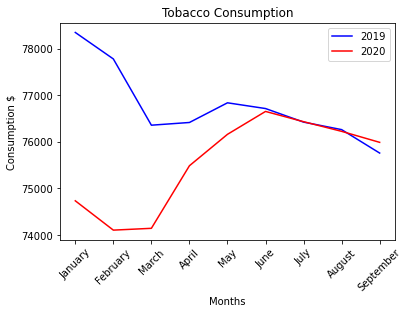

In [25]:
# Tobacco Trends

plt.plot(x_values, nond_data19.loc['Tobacco (127)',:], color='blue')
plt.plot(x_values, nond_data20.loc['Tobacco (127)',:], color='red')

plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.title('Tobacco Consumption')
plt.xticks(rotation=45)
plt.legend(['2019','2020'], loc='best')

# Final Recommendations

Based on our data, our recommendations for a second wave are as follows:

* If able, stock up early on necessities. You want to try to purchase before the initial panic spike purchases happen. Things like toilet paper, cleaning supplies, and groceries would be good to have a stockpile of as it could become difficult to purchase even just for regular day use.
* Be prepared to be flexible with purchases. COVID has effected the production of multiple products, so be prepared for shortages, increases in price, and purchase limits.
* Think ahead for items you may need if quarantine continues for very long. Items for working from home and recreation are good to grab early as we did see outtages and increased delivery times of some of these products a month or two into quarantine.